# Load Data 

In [2]:
import tensorflow as tf

# Path to your dataset
dataset_path = "../../data"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=f"{dataset_path}/train",
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(48, 48),
    shuffle=True,
    seed=123
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=f"{dataset_path}/test",
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(48, 48),
    shuffle=False
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Get class names (subfolder names)
class_names = train_dataset.class_names
num_classes = len(class_names)
print("Class names:", class_names)


Class names: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


# Visualisation des Images 

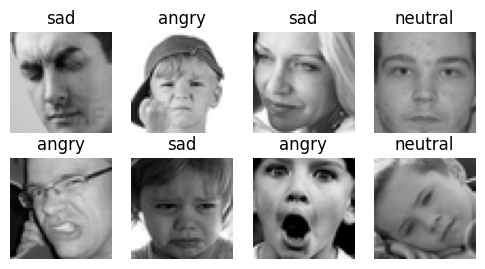

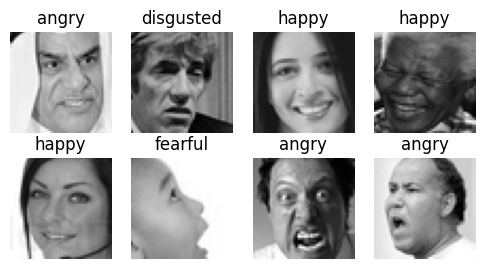

In [4]:
# Take one batch of images and labels
for images, labels in train_dataset.take(2):
    plt.figure(figsize=(6, 3))
    for i in range(8):  # display 8 images from the batch
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = class_names[labels[i]]  # convert label index to class name
        plt.title(label)
        plt.axis("off")
    plt.show()

# Normalize and prepare the dataset

# Add Data Augmentation

In [5]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),       # flip horizontally
    tf.keras.layers.RandomRotation(0.1),            # rotate ±10%
    tf.keras.layers.RandomZoom(0.1),                # zoom in/out 10%
])


In [10]:
from tensorflow import keras

from tensorflow import keras

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )]

model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(48, 48, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu',),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='softmax')
])

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# --- Train ---
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10


163/449 ━━━━━━━━━━━━━━━━━━━━ 1:09 242ms/step - accuracy: 0.2181 - loss: 1.8581

KeyboardInterrupt: 

In [9]:
validationAccuracy = model.evaluate(test_dataset)
print("Validation accuracy:", validationAccuracy)

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5648 - loss: 1.1596
Validation accuracy: [1.1595546007156372, 0.5647812485694885]


In [11]:
import os

model.save('./ml_models/emotion_detection.keras')
print("Modèle sauvegardé !!!!")

Modèle sauvegardé !!!!
